In [1]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from IPython.display import Image
import pandas as pd
import seaborn as sns
import numpy as np
sns.set()

### Get data from clustering restulrs and combine with ACS data

In [39]:
#Clustering result
cc_d = pd.read_csv('cc_d_clusters.csv')

In [14]:
#ACS data
data = pd.read_csv('test.csv')

In [16]:
cc_d.head()

,DOLocationID,payment_2017_01,payment_2017_02,payment_2017_03,payment_2017_04,payment_2017_05,payment_2017_06,payment_2017_07,payment_2017_08,payment_2017_09,...,payment_2018_04,payment_2018_05,payment_2018_06,payment_2018_07,payment_2018_08,payment_2018_09,payment_2018_10,payment_2018_11,payment_2018_12,k3_labels
0,1,0.773500,0.809257,0.819703,0.789566,0.799558,0.807751,0.764207,0.766567,0.781581,...,0.784376,0.793612,0.809752,0.771895,0.779982,0.797500,0.798682,0.803943,0.778812,0
1,2,0.750000,0.750000,0.500000,0.500000,0.444444,0.400000,0.333333,0.000000,0.800000,...,0.571429,0.500000,1.000000,0.500000,0.400000,0.428571,1.000000,0.615385,0.727273,2
2,3,0.480331,0.490486,0.520067,0.510067,0.490231,0.514545,0.479501,0.464481,0.520256,...,0.575563,0.583882,0.606742,0.571678,0.545312,0.574013,0.620035,0.645000,0.685185,2
3,4,0.650558,0.664240,0.657215,0.657246,0.653265,0.652397,0.646219,0.639608,0.648170,...,0.662457,0.658469,0.660813,0.655350,0.658979,0.670518,0.675637,0.669492,0.651301,0
4,5,0.655738,0.675000,0.690909,0.680556,0.627451,0.660000,0.600000,0.615385,0.708333,...,0.701754,0.857143,0.810345,0.734694,0.750000,0.791045,0.830986,0.766667,0.829268,0


In [20]:
data.head()

,Unnamed: 0,zone,DOLocationID,geometry,tripcount,credit_rate,NTAName,income,MaleP,MdAgeE,Degree,barcount
0,0,Astoria Park,8,POLYGON ((-73.92334041500001 40.77512891199992...,1739,0.568143,park-cemetery-etc-Queens,58460.0,57.9,40.8,24.7,1
1,1,Flushing Meadows-Corona Park,93,"POLYGON ((-73.8569635593979 40.76407442786307,...",17290,0.586003,park-cemetery-etc-Queens,58460.0,57.9,40.8,24.7,4
2,2,Forest Park/Highland Park,96,POLYGON ((-73.83804164799996 40.70832329499993...,1757,0.482072,park-cemetery-etc-Queens,58460.0,57.9,40.8,24.7,1
3,3,Willets Point,253,"POLYGON ((-73.83908354399988 40.7652569129999,...",725,0.390345,park-cemetery-etc-Queens,58460.0,57.9,40.8,24.7,7
4,4,Allerton/Pelham Gardens,3,"POLYGON ((-73.84792614099985 40.8713422339999,...",6968,0.594575,Allerton-Pelham Gardens,59992.0,46.9,40.7,25.8,30


In [46]:
data = data.drop(columns={'Unnamed: 0'})

### Find dismatch between 2 datasets

In [21]:
data.shape

(250, 12)

In [23]:
cc_d.shape

(264, 26)

In [24]:
cc_d_zone = list(cc_d['DOLocationID'].unique())

In [122]:
len(cc_d_zone)

264

In [25]:
data_zone = list(data['DOLocationID'].unique())

In [28]:
result = set(cc_d_zone) - set(data_zone) 
print(sorted(result)) 

[1, 2, 46, 57, 59, 104, 105, 110, 111, 194, 199, 207, 264, 265]


### Visulize the clustering results

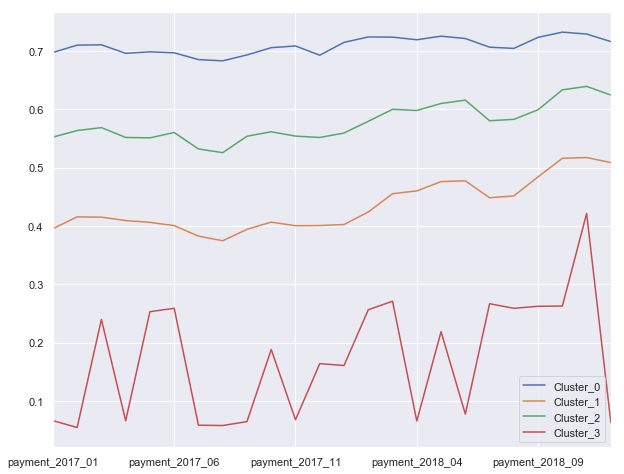

In [3]:
fig,ax = plt.subplots(figsize=(10,8))

cc_d[cc_d['k3_labels']== 0 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_0')
cc_d[cc_d['k3_labels']== 1 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_1')
cc_d[cc_d['k3_labels']== 2 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_2')
cc_d[cc_d['k3_labels']== 3 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_3')
plt.legend()

Cluster 0, 1, and 2 have a slightly increasing trend, while the cluster 3 behaves weired with many ups and downs.

In [4]:
import geopandas as gpd

In [117]:
gdf = gpd.read_file('../FHV/taxi_zones/taxi_zones.shp')

In [116]:
gdf.set_index('LocationID',inplace=True)

In [118]:
gdf = gdf.rename(columns={'LocationID':'DOLocationID'})

In [125]:
gdf_zone = list(gdf['DOLocationID'].unique())

In [132]:
#Discrepency between shapefile and cc_d
result = set(cc_d_zone) - set(gdf_zone) 
print(sorted(result)) 

[57, 104, 105, 264, 265]


In [119]:
merged_gdf = gdf.merge(cc_d,on='DOLocationID')

In [131]:
merged_gdf.shape

(260, 32)

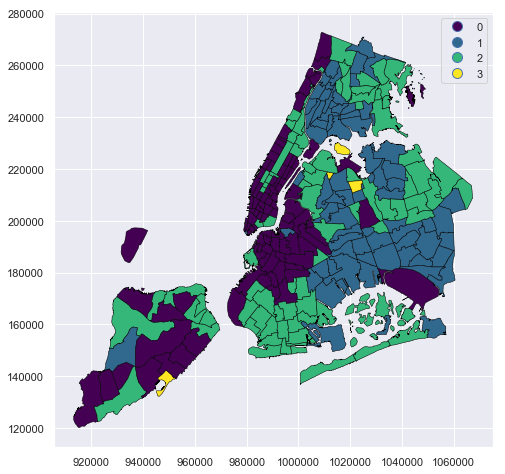

In [130]:
fig,ax = plt.subplots(figsize=(10,8))
merged_gdf.plot(ax=ax, column='k3_labels',cmap='viridis',figsize=(20,20),legend=True,label='clusters',edgecolor='black' ,linewidth=0.5,categorical=True)

- Cluster 0 covers midtown and downtown Manhattan, as well as downtown Brooklyn. Thoes areas have the highest credit card usage rate. 
- Cluster 2 has the second highest rate of credit card usage. It includes areas including upper Manhattan, Long Island, Astoria, and central Queens. 
- Cluster 1 has the third highest rate of credit card usage.It includes some remote areas in Queens, and Morrisania in Bronx. 
- Cluster 3 only have 4 areas according to the map. Most of them are non-redisdential areas like cemetery and parks. They are apprently outliers.

### Clustering analysis

 - Investigate the differences within 3 clusters based on:
     - trip count
     - income
     - Male population
     - Median age
     - Educational degree
     - Number of liquors vendors (bars, resturants...)

#### TripCount

In [157]:
cc_data[cc_data['k3_labels'] == 0]['tripcount'].describe()

count    9.500000e+01
mean     8.242735e+05
std      1.019444e+06
min      5.370000e+02
25%      7.387100e+04
50%      2.955650e+05
75%      1.366020e+06
max      3.961493e+06
Name: tripcount, dtype: float64

In [159]:
cc_data[cc_data['k3_labels'] == 1]['tripcount'].describe()

count        73.000000
mean      23293.753425
std       27369.035324
min          53.000000
25%        9278.000000
50%       14193.000000
75%       27435.000000
max      172401.000000
Name: tripcount, dtype: float64

In [161]:
cc_data[cc_data['k3_labels'] == 2]['tripcount'].describe()

count    8.100000e+01
mean     2.493281e+05
std      6.473353e+05
min      5.830000e+02
25%      6.799000e+03
50%      1.398400e+04
75%      4.247200e+04
max      3.155852e+06
Name: tripcount, dtype: float64

#### Obervation: 
- The mean trip count for cluster 0 is 824873
- The mean trip count for cluster 2 is 249328
- The mean trip count for cluster 1 is 23293
- The is a positive correlation between credit card usage and the average number of trip count for 3 clusters.

#### Median Household Income

In [180]:
cc_data[cc_data['k3_labels'] == 0]['income'].describe()

count        92.000000
mean      90076.663043
std       29722.991151
min       31180.000000
25%       68537.500000
50%       93973.500000
75%      116208.250000
max      155786.000000
Name: income, dtype: float64

In [181]:
cc_data[cc_data['k3_labels'] == 1]['income'].describe()

count        72.000000
mean      48630.875000
std       20079.875703
min       21369.000000
25%       29104.750000
50%       46177.500000
75%       62693.250000
max      102205.000000
Name: income, dtype: float64

In [182]:
cc_data[cc_data['k3_labels'] == 2]['income'].describe()

count        79.000000
mean      59049.443038
std       20952.549519
min       24727.000000
25%       46247.000000
50%       55814.000000
75%       70202.500000
max      116456.000000
Name: income, dtype: float64

#### Obervation: 
- The average median household income for cluster 0 is 90076
- The average median household income for cluster 2 is 59049
- The average median household income for cluster 1 is 48630
- The is a positive correlation between credit card usage and the average median household income  for 3 clusters.

##### MaleP

In [184]:
cc_data[cc_data['k3_labels'] == 0]['MaleP'].describe()

count    93.000000
mean     48.490323
std       5.088458
min      39.900000
25%      46.000000
50%      48.100000
75%      49.700000
max      87.800000
Name: MaleP, dtype: float64

In [185]:
cc_data[cc_data['k3_labels'] == 1]['MaleP'].describe()

count    73.000000
mean     48.231507
std       5.753281
min      39.300000
25%      46.000000
50%      47.700000
75%      49.200000
max      87.800000
Name: MaleP, dtype: float64

In [186]:
cc_data[cc_data['k3_labels'] == 2]['MaleP'].describe()

count    81.000000
mean     49.255556
std       6.703301
min      42.900000
25%      46.400000
50%      48.300000
75%      49.600000
max      87.800000
Name: MaleP, dtype: float64

#### Observation: 
There is no correlation between age and clusters.

#### MdAgeE

In [190]:
cc_data[cc_data['k3_labels'] == 0]['MdAgeE'].describe()

count    93.000000
mean     36.993548
std       4.194168
min      29.100000
25%      34.100000
50%      36.500000
75%      40.000000
max      50.900000
Name: MdAgeE, dtype: float64

In [191]:
cc_data[cc_data['k3_labels'] == 1]['MdAgeE'].describe()

count    73.000000
mean     36.178082
std       5.436968
min      19.300000
25%      32.300000
50%      35.600000
75%      39.000000
max      50.900000
Name: MdAgeE, dtype: float64

In [192]:
cc_data[cc_data['k3_labels'] == 2]['MdAgeE'].describe()

count    81.000000
mean     38.239506
std       5.105479
min      25.100000
25%      34.400000
50%      37.500000
75%      41.600000
max      50.900000
Name: MdAgeE, dtype: float64

#### Observation: 
There is no correlation between age and clusters.

#### Educational Degree (%)

In [194]:
cc_data[cc_data['k3_labels'] == 0]['Degree'].describe()

count    93.000000
mean     59.459140
std      21.334088
min       6.100000
25%      36.300000
50%      64.700000
75%      78.300000
max      84.600000
Name: Degree, dtype: float64

In [196]:
cc_data[cc_data['k3_labels'] == 1]['Degree'].describe()

count    73.000000
mean     21.101370
std       9.092205
min       6.100000
25%      14.100000
50%      21.300000
75%      25.800000
max      63.300000
Name: Degree, dtype: float64

In [197]:
cc_data[cc_data['k3_labels'] == 2]['Degree'].describe()

count    81.000000
mean     35.214815
std      14.828917
min       6.100000
25%      25.700000
50%      33.000000
75%      42.400000
max      78.300000
Name: Degree, dtype: float64

#### Obervation: 
- The percentage of population having educational degree for cluster 0 is 59%
- The percentage of population having educational degree for cluster 2 is 35%
- The percentage of population having educational degree for cluster 1 is 21%
- The is a positive correlation between credit card usage and the percentage of population having educational degree for 3 clusters.

#### barcount

In [199]:
cc_data[cc_data['k3_labels'] == 0]['barcount'].describe()

count     95.000000
mean     106.494737
std       79.315807
min        1.000000
25%       47.000000
50%       85.000000
75%      150.000000
max      481.000000
Name: barcount, dtype: float64

In [200]:
cc_data[cc_data['k3_labels'] == 1]['barcount'].describe()

count     73.000000
mean      56.575342
std       42.288663
min        1.000000
25%       27.000000
50%       49.000000
75%       68.000000
max      198.000000
Name: barcount, dtype: float64

In [201]:
cc_data[cc_data['k3_labels'] == 2]['barcount'].describe()

count     81.000000
mean      65.962963
std       62.468681
min        1.000000
25%       30.000000
50%       50.000000
75%       85.000000
max      343.000000
Name: barcount, dtype: float64

#### Obervation: 
- The average number of liquor vendors for cluster 0 is 106
- The average number of liquor vendors for cluster 2 is 65
- The average number of liquor vendors for cluster 1 is 56
- The is a positive correlation between credit card usage and average number of liquor vendors for 3 clusters.